# Limpieza de Datos

### Importar librerias

In [611]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargar Archivo CSV

In [612]:
df=pd.read_csv("datos_apartamentos_rent.csv")

### Eliminación de variables descriptivas o poco significativas

In [613]:
df=df.drop(['id','title','body','currency','fee','price_display','address','source','cityname'],axis=1)


In [614]:
df.head()

,category,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,state,latitude,longitude,time
0,housing/rent/apartment,NaN,NaN,0.0,Thumbnail,NaN,790,Monthly,101,DC,389057.0,-769861.0,1577359415
1,housing/rent/apartment,NaN,NaN,1.0,Thumbnail,NaN,425,Monthly,106,IN,379680.0,-876621.0,1577017063
2,housing/rent/apartment,NaN,1.0,0.0,Thumbnail,NaN,1390,Monthly,107,VA,388910.0,-770816.0,1577359410
3,housing/rent/apartment,NaN,1.0,0.0,Thumbnail,NaN,925,Monthly,116,WA,476160.0,-1223275.0,1576667743
4,housing/rent/apartment,NaN,NaN,0.0,Thumbnail,NaN,880,Monthly,125,VA,388738.0,-771055.0,1577359401


In [615]:
df.shape

(10000, 13)

In [616]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9.990000e+03,1.000000e+04
mean,1.380544,1.744021,1486.277500,945.810500,376951.620420,-9.465225e+05,1.574891e+09
std,0.615410,0.942354,1076.507968,655.755736,54958.509131,1.575980e+05,3.762395e+06
min,1.000000,0.000000,200.000000,101.000000,213155.000000,-1.580221e+06,1.568744e+09
25%,1.000000,1.000000,949.000000,649.000000,336798.500000,-1.013017e+06,1.568781e+09
50%,1.000000,2.000000,1270.000000,802.000000,388098.000000,-9.365160e+05,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,413498.000000,-8.220998e+05,1.577359e+09
max,8.500000,9.000000,52500.000000,40000.000000,615940.000000,-7.019160e+05,1.577362e+09


### Revisión de Duplicados en el DF

In [617]:
duplicates=len(df[df.duplicated()])
print(f'Numer of Duplicates Entries:{duplicates}')

Numer of Duplicates Entries:8


### Eliminación de Duplicados

In [618]:
df=df.drop_duplicates()

### Revisar faltantes por columna

In [619]:
print(df.isnull().sum())

category           0
amenities       3545
bathrooms         34
bedrooms           7
has_photo          0
pets_allowed    4160
price              0
price_type         0
square_feet        0
state             75
latitude          10
longitude         10
time               0
dtype: int64


### Eliminación de algunas columnas con faltantes

In [620]:
df=df.drop(['amenities','pets_allowed'],axis=1)

### Modificación de faltantes

In [621]:
df=df.dropna(subset=['state', 'latitude'])

In [622]:
df.loc[:,'bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df.loc[:,'bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

### Revisión de faltantes

In [623]:
print(df.isnull().sum())

category       0
bathrooms      0
bedrooms       0
has_photo      0
price          0
price_type     0
square_feet    0
state          0
latitude       0
longitude      0
time           0
dtype: int64


### Tipos de datos en el dataset

In [624]:
types = df.dtypes.value_counts()

print('Number of Features: %d'%(df.shape[1]))
print('Number of Customers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 11
Number of Customers: 9917
Data Types and Frequency in Dataset:
object     4
float64    4
int64      3
Name: count, dtype: int64


### Análisis de valores atipicos

In [625]:
# Seleccionar solo las dos columnas deseadas
columnas_seleccionadas = ['bathrooms', 'latitude','longitude']
datos_seleccionados = df[columnas_seleccionadas]

# Calcular cuartiles e IQR
Q1 = datos_seleccionados.quantile(0.25)
Q3 = datos_seleccionados.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers1 = ((datos_seleccionados < (Q1 - 1.5 * IQR)) | (datos_seleccionados > (Q3 + 1.5 * IQR)))

print(outliers1)


      bathrooms  latitude  longitude
0         False     False      False
1         False     False      False
2         False     False      False
3         False     False      False
4         False     False      False
...         ...       ...        ...
9995       True     False      False
9996       True     False      False
9997       True     False      False
9998      False     False      False
9999      False     False      False

[9917 rows x 3 columns]


In [626]:
print(outliers1.sum())

bathrooms    72
latitude     56
longitude    56
dtype: int64


In [627]:
df_cleaned=df[(outliers1==False).all(axis=1)]
print(df_cleaned)

                    category  bathrooms  bedrooms  has_photo  price  \
0     housing/rent/apartment        1.0       0.0  Thumbnail    790   
1     housing/rent/apartment        1.0       1.0  Thumbnail    425   
2     housing/rent/apartment        1.0       0.0  Thumbnail   1390   
3     housing/rent/apartment        1.0       0.0  Thumbnail    925   
4     housing/rent/apartment        1.0       0.0  Thumbnail    880   
...                      ...        ...       ...        ...    ...   
9982  housing/rent/apartment        3.5       5.0  Thumbnail   2395   
9983  housing/rent/apartment        3.5       4.0  Thumbnail   7800   
9989  housing/rent/apartment        3.5       5.0  Thumbnail   3980   
9998  housing/rent/apartment        1.0       1.0  Thumbnail   4790   
9999  housing/rent/apartment        1.0       1.0         No   1009   

     price_type  square_feet state  latitude  longitude        time  
0       Monthly          101    DC  389057.0  -769861.0  1577359415  
1      

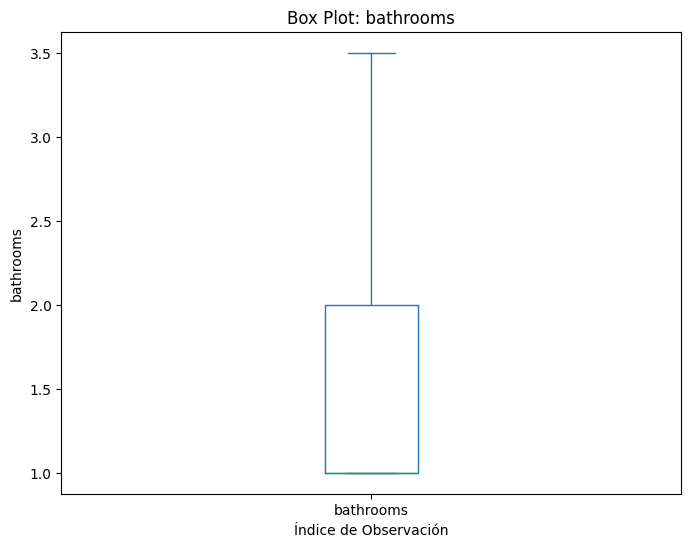

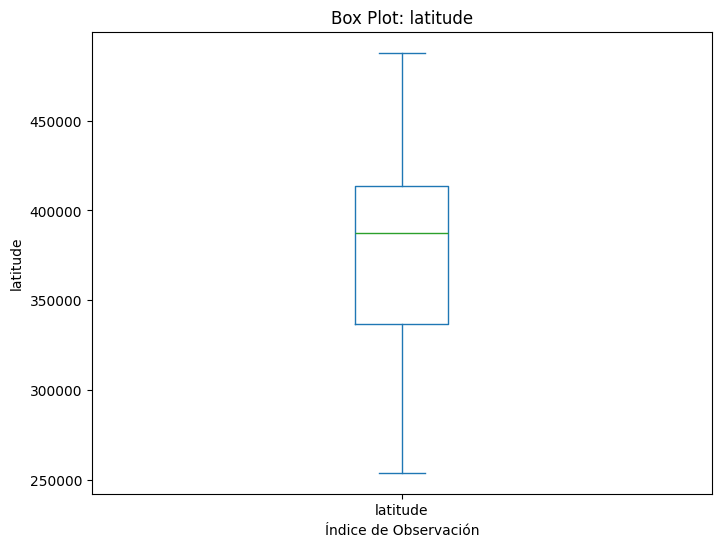

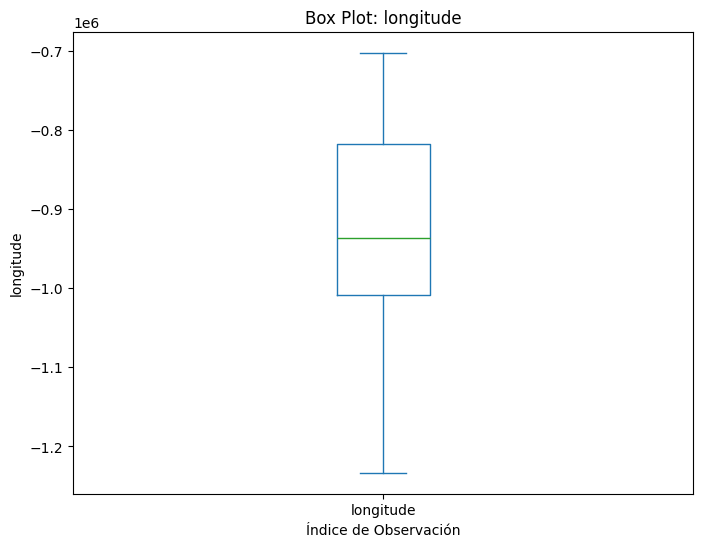

In [628]:
for column in datos_seleccionados.columns:
    plt.figure(figsize=(8, 6))
    df_cleaned[column].plot(kind='box')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

In [629]:
outliers_bedrooms=df[df['bedrooms']>4]
print(outliers_bedrooms)

                    category  bathrooms  bedrooms  has_photo  price  \
7907  housing/rent/apartment        2.0       5.0  Thumbnail   7400   
8485  housing/rent/apartment        2.0       5.0  Thumbnail   2625   
8565  housing/rent/apartment        2.0       5.0  Thumbnail   4200   
8722  housing/rent/apartment        1.0       5.0  Thumbnail   2495   
8736  housing/rent/apartment        2.0       5.0  Thumbnail   1995   
...                      ...        ...       ...        ...    ...   
9993  housing/rent/apartment        5.0       5.0  Thumbnail   6900   
9994  housing/rent/apartment        4.0       6.0  Thumbnail   3000   
9995  housing/rent/apartment        4.0       5.0  Thumbnail   6000   
9996  housing/rent/apartment        8.0       6.0  Thumbnail  25000   
9997  housing/rent/apartment        8.5       6.0  Thumbnail  11000   

     price_type  square_feet state  latitude  longitude        time  
7907    Monthly         1170    CA  377599.0 -1224379.0  1577359542  
8485   

                    category  bathrooms  bedrooms  has_photo  price  \
0     housing/rent/apartment        1.0       0.0  Thumbnail    790   
1     housing/rent/apartment        1.0       1.0  Thumbnail    425   
2     housing/rent/apartment        1.0       0.0  Thumbnail   1390   
3     housing/rent/apartment        1.0       0.0  Thumbnail    925   
4     housing/rent/apartment        1.0       0.0  Thumbnail    880   
...                      ...        ...       ...        ...    ...   
9983  housing/rent/apartment        3.5       4.0  Thumbnail   7800   
9990  housing/rent/apartment        5.0       4.0  Thumbnail  19500   
9992  housing/rent/apartment        5.0       4.0  Thumbnail   4500   
9998  housing/rent/apartment        1.0       1.0  Thumbnail   4790   
9999  housing/rent/apartment        1.0       1.0         No   1009   

     price_type  square_feet state  latitude  longitude        time  
0       Monthly          101    DC  389057.0  -769861.0  1577359415  
1      

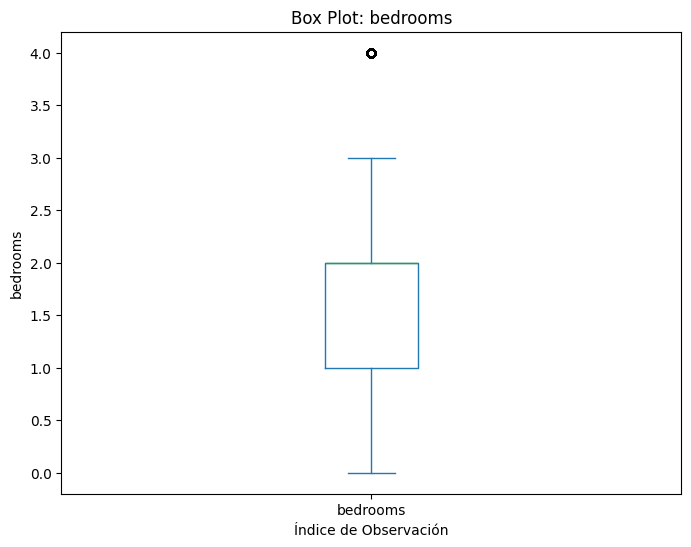

In [630]:
df_cleaned = df.drop(outliers_bedrooms.index)
print(df_cleaned)

plt.figure(figsize=(8, 6))
df_cleaned['bedrooms'].plot(kind='box')
plt.title('Box Plot: bedrooms')
plt.xlabel('Índice de Observación')
plt.ylabel('bedrooms')
plt.show() 


In [631]:
outliers_price=df[df['price']>10000]
print(outliers_price)
outliers_sqfeet=df[df['square_feet']>8000]
print(outliers_sqfeet)

                    category  bathrooms  bedrooms  has_photo  price  \
8573  housing/rent/apartment        2.0       2.0  Thumbnail  11000   
8581  housing/rent/apartment        2.0       2.0  Thumbnail  13500   
8829  housing/rent/apartment        1.0       0.0  Thumbnail  52500   
9227  housing/rent/apartment        2.0       2.0  Thumbnail  10600   
9825  housing/rent/apartment        3.0       3.0  Thumbnail  13000   
9946  housing/rent/apartment        1.0       5.0  Thumbnail  11000   
9972  housing/rent/apartment        4.0       6.0  Thumbnail  14950   
9990  housing/rent/apartment        5.0       4.0  Thumbnail  19500   
9996  housing/rent/apartment        8.0       6.0  Thumbnail  25000   
9997  housing/rent/apartment        8.5       6.0  Thumbnail  11000   

     price_type  square_feet state  latitude  longitude        time  
8573    Monthly         1322    CA  326596.0 -1171595.0  1577360129  
8581    Monthly         1325    CA  340630.0 -1184363.0  1568748646  
8829    

                    category  bathrooms  bedrooms  has_photo  price  \
0     housing/rent/apartment        1.0       0.0  Thumbnail    790   
1     housing/rent/apartment        1.0       1.0  Thumbnail    425   
2     housing/rent/apartment        1.0       0.0  Thumbnail   1390   
3     housing/rent/apartment        1.0       0.0  Thumbnail    925   
4     housing/rent/apartment        1.0       0.0  Thumbnail    880   
...                      ...        ...       ...        ...    ...   
9993  housing/rent/apartment        5.0       5.0  Thumbnail   6900   
9994  housing/rent/apartment        4.0       6.0  Thumbnail   3000   
9995  housing/rent/apartment        4.0       5.0  Thumbnail   6000   
9998  housing/rent/apartment        1.0       1.0  Thumbnail   4790   
9999  housing/rent/apartment        1.0       1.0         No   1009   

     price_type  square_feet state  latitude  longitude        time  
0       Monthly          101    DC  389057.0  -769861.0  1577359415  
1      

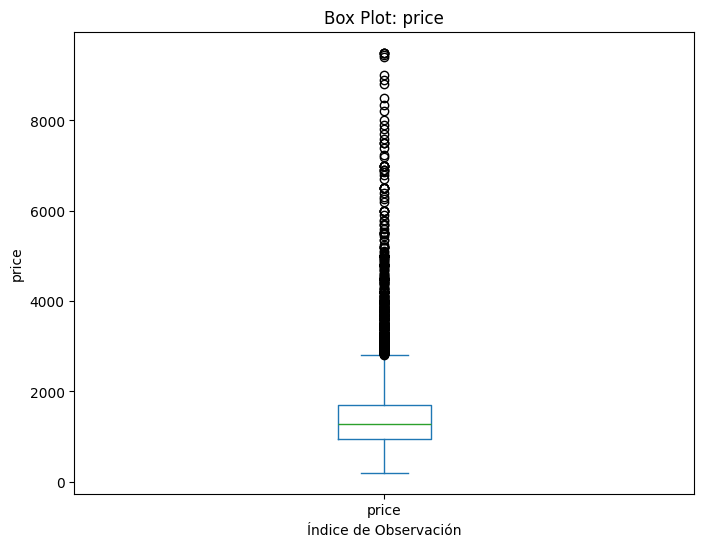

In [632]:
df_cleaned = df.drop(outliers_price.index)
print(df_cleaned)

plt.figure(figsize=(8, 6))
df_cleaned['price'].plot(kind='box')
plt.title('Box Plot: price')
plt.xlabel('Índice de Observación')
plt.ylabel('price')
plt.show() 

                    category  bathrooms  bedrooms  has_photo  price  \
0     housing/rent/apartment        1.0       0.0  Thumbnail    790   
1     housing/rent/apartment        1.0       1.0  Thumbnail    425   
2     housing/rent/apartment        1.0       0.0  Thumbnail   1390   
3     housing/rent/apartment        1.0       0.0  Thumbnail    925   
4     housing/rent/apartment        1.0       0.0  Thumbnail    880   
...                      ...        ...       ...        ...    ...   
9992  housing/rent/apartment        5.0       4.0  Thumbnail   4500   
9993  housing/rent/apartment        5.0       5.0  Thumbnail   6900   
9994  housing/rent/apartment        4.0       6.0  Thumbnail   3000   
9995  housing/rent/apartment        4.0       5.0  Thumbnail   6000   
9999  housing/rent/apartment        1.0       1.0         No   1009   

     price_type  square_feet state  latitude  longitude        time  
0       Monthly          101    DC  389057.0  -769861.0  1577359415  
1      

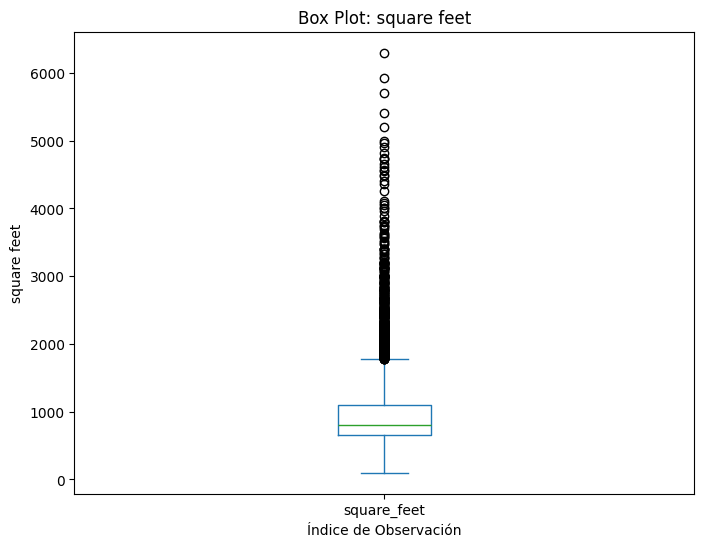

In [633]:
df_cleaned = df.drop(outliers_sqfeet.index)
print(df_cleaned)

plt.figure(figsize=(8, 6))
df_cleaned['square_feet'].plot(kind='box')
plt.title('Box Plot: square feet')
plt.xlabel('Índice de Observación')
plt.ylabel('square feet')
plt.show() 

In [634]:
# Definir el umbral mínimo de datos por categoría
umbral = 90  # Cambia este valor según tu criterio

# Contar la frecuencia de cada categoría en la columna
conteo = df_cleaned['state'].value_counts()

# Reemplazar las categorías con menos datos que el umbral por "Otras"
df_cleaned['state'] = df_cleaned['state'].apply(lambda x: 'Otros' if conteo[x] < umbral else x)

# Mostrar el DataFrame modificado
print(df_cleaned)


                    category  bathrooms  bedrooms  has_photo  price  \
0     housing/rent/apartment        1.0       0.0  Thumbnail    790   
1     housing/rent/apartment        1.0       1.0  Thumbnail    425   
2     housing/rent/apartment        1.0       0.0  Thumbnail   1390   
3     housing/rent/apartment        1.0       0.0  Thumbnail    925   
4     housing/rent/apartment        1.0       0.0  Thumbnail    880   
...                      ...        ...       ...        ...    ...   
9992  housing/rent/apartment        5.0       4.0  Thumbnail   4500   
9993  housing/rent/apartment        5.0       5.0  Thumbnail   6900   
9994  housing/rent/apartment        4.0       6.0  Thumbnail   3000   
9995  housing/rent/apartment        4.0       5.0  Thumbnail   6000   
9999  housing/rent/apartment        1.0       1.0         No   1009   

     price_type  square_feet  state  latitude  longitude        time  
0       Monthly          101  Otros  389057.0  -769861.0  1577359415  
1    

In [635]:
catcols = df_cleaned.select_dtypes(exclude = ['int64','float64']).columns
 
data_dummie = pd.get_dummies(df_cleaned, columns = catcols, dtype=int, drop_first=True)

data_dummie


,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,category_housing/rent/home,category_housing/rent/short_term,has_photo_Thumbnail,...,state_OH,state_OK,state_OR,state_Otros,state_PA,state_TN,state_TX,state_VA,state_WA,state_WI
0,1.0,0.0,790,101,389057.0,-769861.0,1577359415,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1.0,1.0,425,106,379680.0,-876621.0,1577017063,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1390,107,388910.0,-770816.0,1577359410,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.0,0.0,925,116,476160.0,-1223275.0,1576667743,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0.0,880,125,388738.0,-771055.0,1577359401,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,5.0,4.0,4500,5407,448653.0,-934749.0,1576667692,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9993,5.0,5.0,6900,5700,281253.0,-824468.0,1577359442,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9994,4.0,6.0,3000,5921,370835.0,-1135823.0,1577017103,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9995,4.0,5.0,6000,6300,449000.0,-933233.0,1575112975,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [636]:
df_cleaned['state'].value_counts()

state
TX       1734
CA        954
Otros     893
WA        519
NC        438
MD        423
NJ        383
GA        372
FL        339
OH        319
CO        318
WI        301
IL        282
IN        239
MO        239
MN        221
VA        205
OR        197
PA        183
IA        179
OK        178
MI        176
MA        167
AZ        126
NV        121
ND        113
NE        105
CT         98
TN         92
Name: count, dtype: int64

In [637]:
print(list(data_dummie.columns))

['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude', 'time', 'category_housing/rent/home', 'category_housing/rent/short_term', 'has_photo_Thumbnail', 'has_photo_Yes', 'price_type_Monthly|Weekly', 'price_type_Weekly', 'state_CA', 'state_CO', 'state_CT', 'state_FL', 'state_GA', 'state_IA', 'state_IL', 'state_IN', 'state_MA', 'state_MD', 'state_MI', 'state_MN', 'state_MO', 'state_NC', 'state_ND', 'state_NE', 'state_NJ', 'state_NV', 'state_OH', 'state_OK', 'state_OR', 'state_Otros', 'state_PA', 'state_TN', 'state_TX', 'state_VA', 'state_WA', 'state_WI']


### Multicolinealidad

In [638]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Añadir constante a X para calcular VIF
X_with_const = sm.add_constant(data_dummie)

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]


for i in range(1,len(vif_data)):
    if vif_data["VIF"][i]>10:
        print(vif_data["Variable"][i],vif_data["VIF"][i])

c:\Users\paula\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


state_TX 13.040866703317594


In [639]:
data_dummie.to_csv('Data_limpia_dummies.csv', index=False)

In [640]:
df_cleaned.to_csv('Data_limpia.csv', index=False)